In [14]:
f = open("C:\\Users\\gmita\\Desktop\\work_3_2_2565\onboard\\WS-DAN.PyTorch-master\\c\\ypred.txt","r")
a = f.read()
ypred = [int(i) for i in a]

f = open("C:\\Users\\gmita\\Desktop\\work_3_2_2565\onboard\\WS-DAN.PyTorch-master\\c\\ytrue.txt","r")
b = f.read()
ytrue = [int(i) for i in b]

print(ypred)
print(ytrue)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 

Classification report

In [15]:
from sklearn.metrics import classification_report


Class_name = ["Curved Mayo Scissor","Scalpel","Straight Dissection Clamp","Straight Mayo Scissor"]

report = classification_report(ytrue, ypred, target_names=Class_name)
print(report)

                           precision    recall  f1-score   support

      Curved Mayo Scissor       0.96      0.99      0.97       110
                  Scalpel       1.00      1.00      1.00       110
Straight Dissection Clamp       1.00      1.00      1.00        92
    Straight Mayo Scissor       0.99      0.94      0.97        90

                 accuracy                           0.99       402
                macro avg       0.99      0.98      0.98       402
             weighted avg       0.99      0.99      0.99       402



In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix

def evaluate_model(y_true, y_pred, num_classes):
    """
    Calculate sensitivity and specificity for each class of a multi-class classification model using confusion matrix.

    Parameters:
    - y_true (numpy.ndarray): Array of true labels
    - y_pred (numpy.ndarray): Array of predicted labels
    - num_classes (int): Number of classes

    Returns:
    - sensitivity (numpy.ndarray): Array of sensitivities, one for each class
    - specificity (numpy.ndarray): Array of specificities, one for each class
    """

    cm = confusion_matrix(y_true, y_pred)
    sensitivity = np.zeros(num_classes)
    specificity = np.zeros(num_classes)

    for i in range(num_classes):
        # calculate true positives, false positives, true negatives, false negatives for class i
        tp = cm[i,i]
        fp = np.sum(cm[:,i]) - tp
        fn = np.sum(cm[i,:]) - tp
        tn = np.sum(cm) - tp - fp - fn

        # calculate sensitivity and specificity for class i
        if (tp + fn) > 0:
            sensitivity[i] = tp / (tp + fn)
        else:
            sensitivity[i] = 0.0

        if (tn + fp) > 0:
            specificity[i] = tn / (tn + fp)
        else:
            specificity[i] = 0.0

    return sensitivity, specificity

In [17]:
a ,b = evaluate_model(ytrue,ypred,4)
from tabulate import tabulate


mydata = [
    ['Class', 'sensitivity',"specificity"],
      [Class_name[0] , round(a[0],4), round(b[0],4)],
      [Class_name[1] , round(a[1],4), round(b[1],4)],
      [Class_name[2] , round(a[2],4), round(b[2],4)],
      [Class_name[3] , round(a[3],4), round(b[3],4)]
]

print(tabulate(mydata))
# print("sensitivity:{} , specificity {}",a,b)

-------------------------  -----------  -----------
Class                      sensitivity  specificity
Curved Mayo Scissor        0.9909       0.9829
Scalpel                    1.0          1.0
Straight Dissection Clamp  1.0          1.0
Straight Mayo Scissor      0.9444       0.9968
-------------------------  -----------  -----------


In [18]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve , roc_auc_score

# def plot_roc_curve(ypred, ytrue):
#     fpr, tpr, thresholds = roc_curve(ytrue, ypred)
#     roc_auc = np.round(roc_auc_score(ytrue, ypred), 2)
#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {})'.format(roc_auc))
#     plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
#     plt.plot([0, 0, 1], [0, 1, 1], color='green', linestyle=':', label='Perfect Classifier')
#     plt.xlabel('False Positive Rate (FPR)')
#     plt.ylabel('True Positive Rate (TPR)')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend()
#     plt.show()

In [19]:
import torchvision.transforms as transforms
def get_transform(resize):
        return transforms.Compose([
            transforms.Resize(size=(int(resize[0] / 0.875), int(resize[1] / 0.875))),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

In [20]:
import os
from PIL import Image
from torch.utils.data import DataLoader
import torch


p = "C:\\Users\\gmita\\Desktop\\work_3_2_2565\\onboard\\WS-DAN.PyTorch-master\\p\\"
name = os.listdir(p)
test_set = []
raw = []
for index,i in enumerate(name):
    image, target = Image.open(os.path.join(p, i)).convert('RGB'), index
    raw.append((image, target))
    transform = get_transform((448,448))
    image = transform(image)
    test_set.append((image, target))


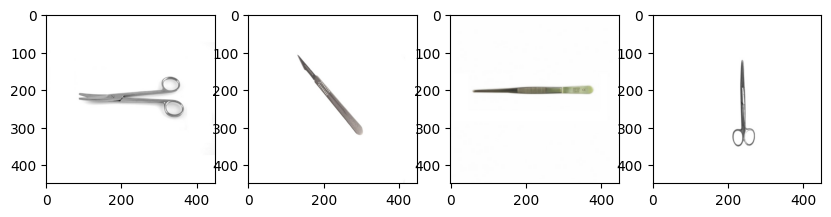

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols= 4, figsize=(10,30))
for index,i in enumerate(raw) :
    im = i[0].resize((448,448))
    ax[index].imshow(im)

2023-05-05 12:27:44,258: WARNING: [image.py:720]: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2023-05-05 12:27:44,269: WARNING: [image.py:720]: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2023-05-05 12:27:44,280: WARNING: [image.py:720]: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
2023-05-05 12:27:44,289: WARNING: [image.py:720]: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


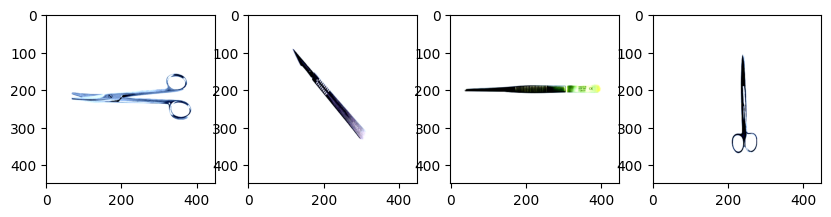

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols= 4, figsize=(10,30))
for index,i in enumerate(test_set) :
    im = i[0].permute(1, 2, 0)
    ax[index].imshow(im)

In [23]:
import logging
import warnings

import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

import config
from models import WSDAN
from datasets import get_trainval_datasets2
from utils import TopKAccuracyMetric, batch_augment

# GPU settings
assert torch.cuda.is_available()
os.environ['CUDA_VISIBLE_DEVICES'] = config.GPU
device = torch.device("cuda")
torch.backends.cudnn.benchmark = True

ToPILImage = transforms.ToPILImage()
MEAN = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1)
STD = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1)

img_vi = []


def generate_heatmap(attention_maps):
    heat_attention_maps = []
    heat_attention_maps.append(attention_maps[:, 0, ...])  # R
    heat_attention_maps.append(attention_maps[:, 0, ...] * (attention_maps[:, 0, ...] < 0.5).float() + \
                               (1. - attention_maps[:, 0, ...]) * (attention_maps[:, 0, ...] >= 0.5).float())  # G
    heat_attention_maps.append(1. - attention_maps[:, 0, ...])  # B
    return torch.stack(heat_attention_maps, dim=1)


def main():
    logging.basicConfig(
        format='%(asctime)s: %(levelname)s: [%(filename)s:%(lineno)d]: %(message)s',
        level=logging.INFO)
    warnings.filterwarnings("ignore")

    try:
        ckpt = config.eval_ckpt
    except:
        logging.info('Set ckpt for evaluation in config.py')
        return

    ##################################
    # Dataset for testing
    ##################################
    test_loader = DataLoader(test_set, batch_size= 1, shuffle=False,
                             num_workers=2, pin_memory=True)
    ##################################
    # Initialize model
    ##################################
    net = WSDAN(num_classes=4, M=config.num_attentions, net=config.net)

    # Load ckpt and get state_dict
    checkpoint = torch.load(ckpt)
    state_dict = checkpoint['state_dict']

    # Load weights
    net.load_state_dict(state_dict)
    logging.info('Network loaded from {}'.format(ckpt))

    ##################################
    # use cuda
    ##################################
    net.to(device)
    if torch.cuda.device_count() > 1:
        net = nn.DataParallel(net)

    ##################################
    # Prediction
    ##################################
    raw_accuracy = TopKAccuracyMetric(topk=(1, 2))
    ref_accuracy = TopKAccuracyMetric(topk=(1, 2))
    raw_accuracy.reset()
    ref_accuracy.reset()

    net.eval()
    global y_true_list , y_pred_list
    y_true_list = torch.tensor([])
    y_pred_list = torch.tensor([])


    with torch.no_grad():
        pbar = tqdm(total=len(test_loader), unit=' batches')
        pbar.set_description('Validation')
        for i, (X, y) in enumerate(test_loader):
            X = X.to(device)
            y = y.to(device)


            # WS-DAN
            y_pred_raw, _, attention_maps = net(X)

            # Augmentation with crop_mask
            crop_image = batch_augment(X, attention_maps, mode='crop', theta=0.1, padding_ratio=0.05)

            y_pred_crop, _, _ = net(crop_image)
            y_pred = (y_pred_raw + y_pred_crop) / 2.

            _, pred = y_pred.topk(1, 1, True, True)
            pred = torch.reshape(pred, (-1,))

            y_pred_list = torch.cat((y_pred_list,pred.cpu()),0)
            y_true_list = torch.cat((y_true_list,y.cpu()),0)

                # reshape attention maps
            attention_maps = F.upsample_bilinear(attention_maps, size=(X.size(2), X.size(3)))
            attention_maps = torch.sqrt(attention_maps.cpu() / attention_maps.max().item())

            # get heat attention maps
            heat_attention_maps = generate_heatmap(attention_maps)

            # raw_image, heat_attention, raw_attention
            raw_image = X.cpu() * STD + MEAN
            heat_attention_image = raw_image * 0.5 + heat_attention_maps * 0.5
            raw_attention_image = raw_image * attention_maps

            for batch_idx in range(X.size(0)):
                rimg = ToPILImage(raw_image[batch_idx])
                raimg = ToPILImage(raw_attention_image[batch_idx])
                haimg = ToPILImage(heat_attention_image[batch_idx])
                img_vi.append([rimg,raimg,haimg])
            # Top K
            epoch_raw_acc = raw_accuracy(y_pred_raw, y)
            epoch_ref_acc = ref_accuracy(y_pred, y)

            # end of this batch
            batch_info = 'Val Acc: Raw ({:.2f}, {:.2f}), Refine ({:.2f}, {:.2f})'.format(
                epoch_raw_acc[0], epoch_raw_acc[1], epoch_ref_acc[0], epoch_ref_acc[1])
            


            pbar.update()
            pbar.set_postfix_str(batch_info)

        pbar.close()

In [24]:
main()

2023-05-05 12:27:47,223: INFO: [wsdan.py:97]: WSDAN: using inception_mixed_6e as feature extractor, num_classes: 4, num_attentions: 16
2023-05-05 12:27:47,263: INFO: [wsdan.py:138]: WSDAN: All params loaded
2023-05-05 12:27:47,279: INFO: [1035892397.py:65]: Network loaded from C:\Users\gmita\Desktop\work_3_2_2565\onboard\WS-DAN.PyTorch-master\c\model03.ckpt
Validation: 100%|██████████| 4/4 [00:02<00:00,  1.42 batches/s, Val Acc: Raw (75.00, 100.00), Refine (75.00, 100.00)]


In [25]:
print(y_pred_list,y_true_list)

tensor([3., 1., 2., 3.]) tensor([0., 1., 2., 3.])


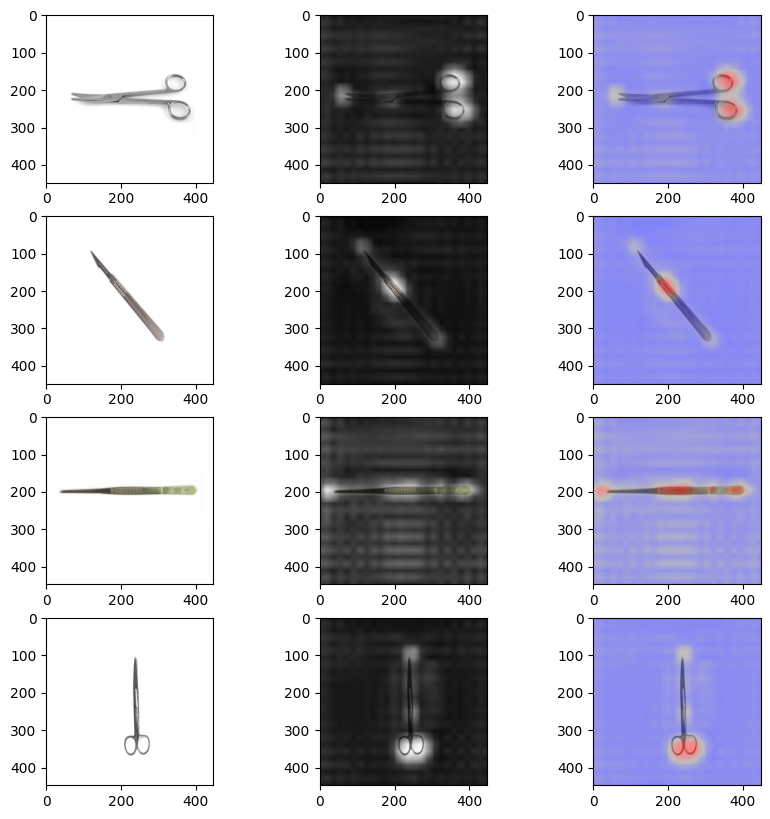

In [26]:
fig, ax = plt.subplots(4,3, figsize=(10,10))
for index ,i in enumerate(img_vi):
    ax[index,0].imshow(img_vi[index][0])
    ax[index,1].imshow(img_vi[index][1])
    ax[index,2].imshow(img_vi[index][2])